## Multivariate normal distribution
This is my explanation to my script.

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import numpy as np
from scipy.stats import multivariate_normal 
default_color = "#81b69d80"

Some more expl.

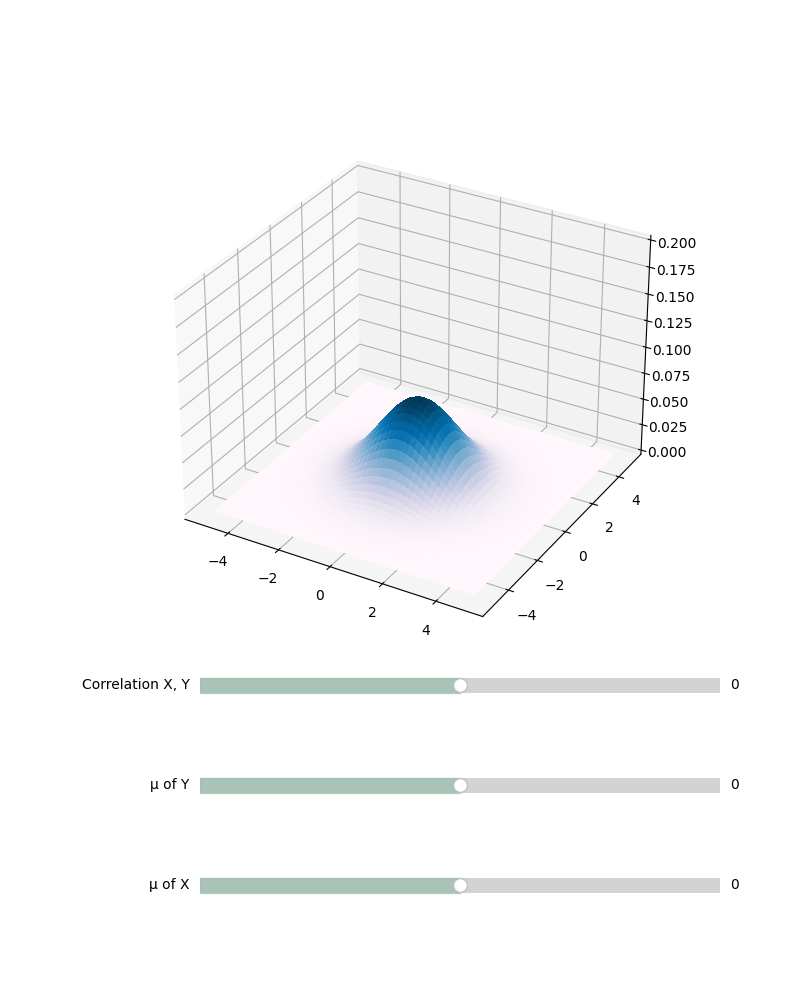

In [2]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 10))
fig.subplots_adjust(bottom=0.35)

x, y = np.mgrid[-5:5:.005, -5:5:.005]
pos = np.dstack((x, y))

ax_x_slider = fig.add_axes([0.25, 0.1, 0.65, 0.03])
ax_y_slider = fig.add_axes([0.25, 0.2, 0.65, 0.03])
ax_corr_slider = fig.add_axes([0.25, 0.3, 0.65, 0.03])

x_mean, y_mean = 0, 0
variance_x, variance_y, correlation_xy = 2, 2, 0

x_slider = Slider(
    ax = ax_x_slider,
    label="μ of X",
    valmin=-5,
    valmax=5,
    valinit=x_mean,
    valstep = np.arange(-5, 5, 0.5),
    color=default_color)

y_slider = Slider(
    ax= ax_y_slider,
    label="μ of Y",
    valmin=-5,
    valmax=5,
    valinit= y_mean,
    valstep = np.arange(-5, 5, 0.5),
    color=default_color)

corr_slider = Slider(
    ax = ax_corr_slider,
    label= "Correlation X, Y",
    valmin=-1,
    valmax=1,
    valinit= 0,
    valstep = np.arange(-1, 1, 0.2),
    color=default_color)

# Change height of bars after moving the slider
def update_dist(val):
    ax.cla()
    x_mean = x_slider.val
    y_mean = y_slider.val
    correlation_xy = corr_slider.val
    covariance = correlation_xy*np.sqrt(variance_x)*np.sqrt(variance_y)
    dist = multivariate_normal(
        [x_mean, y_mean], 
        [[variance_x, covariance], [covariance, variance_y]], 
        allow_singular=True)
    ax.set_zlim(0, 0.2)
    surf = ax.plot_surface(x, y, dist.pdf(pos), cmap=mpl.colormaps["PuBu"],
                       linewidth=0, antialiased=False)    
    fig.canvas.draw_idle()
    


# Register the update function with each slider
x_slider.on_changed(update_dist)
y_slider.on_changed(update_dist)
corr_slider.on_changed(update_dist)

update_dist(0)


plt.show()

This is some more explanation.

![normal](./_static/normal.gif)